In [7]:
import import_ipynb
import networkx as nx
import sys
import os
# dir_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(dir_path)
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
# %run experiment_1.ipynb
import exp_1_diff_sets

In [4]:
data_file = 'topo'  # 'HepPh'
G = clean_data(data_file)
print(nx.number_of_nodes(G), nx.number_of_edges(G))
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)

# set edge attributes
set_edge_attr(G, edge_geo_data_combined)


34 42


In [29]:
max_ = len(opti_rank_m3)/nx.number_of_nodes(G)  # 0.16
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)
infect_prob = compute_probability(G) * 1.5
avg = 100
max_iter = 200000
topk = round(max_ * nx.number_of_nodes(G))
topk


4


4

In [37]:
list(range(10, 21, 1))


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [38]:
cover_probys = [infect_prob / a/10 for a in list(range(10, 21, 1))]
cover_probys

[0.008873239436619718,
 0.008066581306017926,
 0.007394366197183098,
 0.006825568797399782,
 0.006338028169014085,
 0.005915492957746479,
 0.0055457746478873235,
 0.005219552609776305,
 0.004929577464788732,
 0.004670126019273536,
 0.004436619718309859]

In [39]:
m0_result = [get_sir_result(G, ranked_nodes_m0, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m1_result = [get_sir_result(G, ranked_nodes_m1, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m2_result = [get_sir_result(G, ranked_nodes_m2, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m3_result = [get_sir_result(G, ranked_nodes_m3, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]


100%|██████████| 11/11 [02:06<00:00, 11.53s/it]


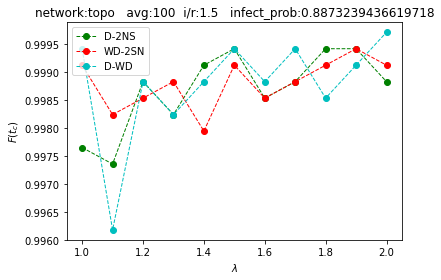

In [41]:
%matplotlib inline
plt.title(f'network:{data_file}   avg:{avg}  i/r:{atio}   infect_prob:{infect_prob}')
plt.plot(np.array(range(10, 21, 1)) / 10, m0_result, 'g--o', label='D-2NS', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, m1_result, 'b-o', label='D-2SN', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 1)) / 10, m2_result, 'r--o', label='WD-2SN', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 1)) / 10, m3_result, 'c--o', label='D-WD', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$\lambda$')
plt.show()
 


In [46]:
print("D-2NS: ",cluster_optimal_nodes(G, opti_rank_m0))
print(" ")
print("WD - 2SN: ",cluster_optimal_nodes(G, opti_rank_m2))
print(" ")
print("D - WD ",cluster_optimal_nodes(G, opti_rank_m3))


D-2NS:  [('27', {'33', '25', '23', '24', '26', '31', '34'}), ('5', {'14', '6', '7', '10', '8', '9', '16'}), ('12', {'20', '30', '32', '21', '22', '13', '11'}), ('28', {'18', '17', '29', '19'}), ('2', {'3', '4', '15', '1'})]
 
WD - 2SN:  [('27', {'33', '25', '23', '24', '26', '31', '34'}), ('5', {'14', '6', '7', '10', '8', '15', '9', '2', '3', '4', '16', '1'}), ('28', {'18', '17', '29', '19'}), ('12', {'13', '11', '32', '20'}), ('22', {'30', '21'})]
 
D - WD  [('27', {'33', '25', '23', '24', '26', '31', '34'}), ('12', {'14', '10', '20', '30', '32', '21', '9', '22', '13', '16', '11'}), ('5', {'6', '7', '8', '15', '2', '3', '4', '1'}), ('28', {'18', '17', '29', '19'})]
